In [2]:
import can
from asammdf import MDF
from inspect import getmembers
from rich import print
from datetime import datetime
import pandas as pd

ldf is not supported
xls is not supported


In [3]:
mf4_file = "data files/Log_OG.mf4"
reader = MDF(mf4_file)


In [ ]:
print("[bold]Contents of a mf4 file")
with open(mf4_file, 'rb') as file:
    for i in range(20):
        print(file.readline())

In [5]:
dbc_database_dir = "DBCs"
dbc_files = []
import os
for root, dirs, files in os.walk(dbc_database_dir):
    for file in files:
        if file.endswith(".dbc"):
            dbc_files.append(os.path.join(root, file))


In [6]:

from typing import List, Iterable, Dict
from asammdf import types

dbc_database_dir = "DBCs"
# mf4_file = input("Input the path to the mf4 file you would like to parse:\n")

dbc_files: List[types.DbcFileType] = []
import os
for root, dirs, files in os.walk(dbc_database_dir):
    for file in files:
        if file.endswith(".dbc"):
            dbc_files.append((os.path.join(root, file),0))


mdf = MDF(mf4_file)
dbcs: Dict[types.BusType, Iterable[types.DbcFileType]] = {"CAN": dbc_files, "LIN": []}

filtered_bus = mdf.extract_bus_logging(database_files=dbcs)


In [7]:
mdf.to_dataframe()

,CAN_DataFrame.CAN_DataFrame.BusChannel,CAN_DataFrame.CAN_DataFrame.ID,CAN_DataFrame.CAN_DataFrame.IDE,CAN_DataFrame.CAN_DataFrame.DLC,CAN_DataFrame.CAN_DataFrame.DataLength,CAN_DataFrame.CAN_DataFrame.DataBytes,CAN_DataFrame.CAN_DataFrame.Dir,CAN_DataFrame.CAN_DataFrame.EDL,CAN_DataFrame.CAN_DataFrame.BRS
timestamps,,,,,,,,,
0.00000,1,772,0,8,8,"[35, 13, 0, 66, 135, 167, 25, 85]",0,0,0
0.00025,1,260,0,7,7,"[92, 253, 255, 135, 10, 252, 47, 0]",0,0,0
0.00100,1,128,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0]",0,0,0
0.00125,1,786,0,8,8,"[0, 0, 0, 0, 0, 0, 0, 0]",0,0,0
0.00150,1,802,0,8,8,"[0, 0, 0, 0, 0, 0, 175, 3]",0,0,0
...,...,...,...,...,...,...,...,...,...
1007.79550,1,544,0,8,8,"[131, 60, 23, 3, 131, 63, 35, 52]",0,0,0
1007.79575,1,420573690,1,8,8,"[112, 254, 220, 5, 36, 250, 0, 0]",0,0,0
1007.79605,1,420639226,1,8,8,"[45, 0, 211, 255, 0, 0, 0, 0]",0,0,0


In [8]:
df_filtered = filtered_bus.to_dataframe()
df_filtered

,bErrEmergencyDischargeReq,MessageCounter_6E,Checksum_6E,ContactorState,Current,Voltage,RequestedState1,DesiredSpeed1,DesiredTorque1,UdcSetP1,...,INV1_FailCode1,DIAG_Downtime,DIAG_Downtime_state,DIAG_Second,DIAG_Minute,DIAG_Hour,DIAG_Day,DIAG_Month,DIAG_Year,DIAG_Mileage
timestamps,,,,,,,,,,,,,,,,,,,,,
0.00000,0,2,110,1,-3.0,389.0,8,0.0,0.0,10,...,1288,0.0,0,2,36,22,20,5,2020.0,10
0.00025,0,2,110,1,-3.0,389.0,8,0.0,0.0,10,...,1288,0.0,0,2,36,22,20,5,2020.0,10
0.00125,0,2,110,1,-3.0,389.0,8,0.0,0.0,10,...,1288,0.0,0,2,36,22,20,5,2020.0,10
0.00740,0,2,110,1,-3.0,389.0,8,0.0,0.0,10,...,1288,0.0,0,2,36,22,20,5,2020.0,10
0.00760,0,2,110,1,-3.0,389.0,8,0.0,0.0,10,...,1288,0.0,0,2,36,22,20,5,2020.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007.79505,0,4,2,1,58.0,371.0,8,0.0,20.0,10,...,0,0.0,0,2,36,22,20,5,2020.0,10
1007.79530,0,4,2,1,58.0,371.0,8,0.0,20.0,10,...,0,0.0,0,2,36,22,20,5,2020.0,10
1007.79550,0,4,2,1,58.0,371.0,8,0.0,20.0,10,...,0,0.0,0,2,36,22,20,5,2020.0,10


In [82]:
# print(list(df_filtered.columns))


/var/folders/pt/9hxgjgjx41qdjd88mmkvhnlh0000gn/T/ipykernel_8011/1826838104.py:18: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  plt.plot(sampled_df.index, sampled_df[col][580:], "-", label=col)


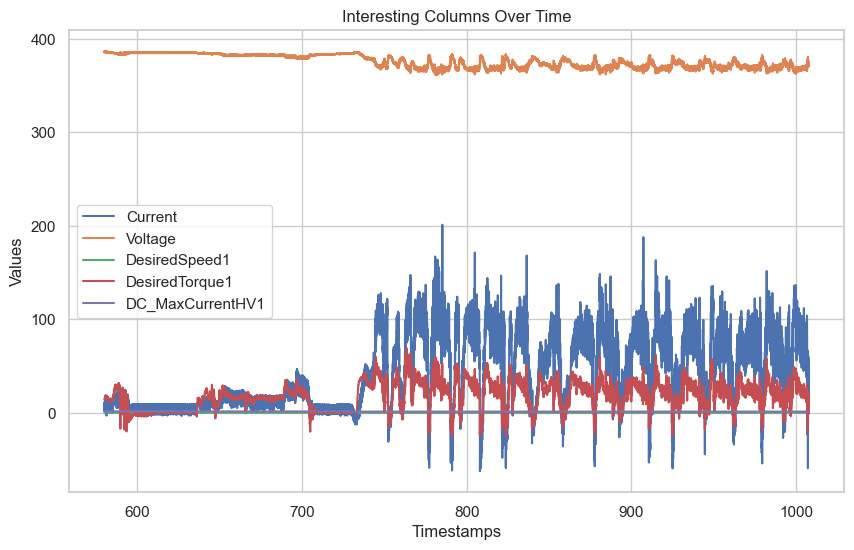

In [54]:
# print(list(df_filtered.columns))
interesting_cols = ["Current",
                    "Voltage",
"DesiredSpeed1",
"DesiredTorque1", 
'DC_MaxCurrentHV1',
]
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')


# Plotting the interesting columns excluding the first 580 samples
plt.figure(figsize=(10, 6))
sampled_df = df_filtered[df_filtered.index>580]
for col in interesting_cols:
    plt.plot(sampled_df.index, sampled_df[col][580:], "-", label=col)

plt.xlabel('Timestamps')
plt.ylabel('Values')
plt.title('Interesting Columns Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# df_filtered['Current'].sum()
# df_filtered['VoltageHV1'].sum()
delta_t = df_filtered.index.diff()
p_used = delta_t* df_filtered['CurrentHV1']* df_filtered['VoltageHV1']
print(f"Total power consumed: {p_used.sum():.4e} Ws")

pkwh = p_used.sum()/1000/60/60
print(f".:Total power consumed: {pkwh:.4e} kWh")

print("[bold] And using Current and Voltage")
delta_t = df_filtered.index.diff()
p_used = delta_t* df_filtered['Current']* df_filtered['Voltage']
print(f"Total power consumed: {p_used.sum():.4e} Ws")

pkwh = p_used.sum()/1000/60/60
print(f".:Total power consumed: {pkwh:.4e} kWh")

Total power consumed: 6.0819e+06 Ws

.:Total power consumed: 1.6894e+00 kWh

 And using Current and Voltage

Total power consumed: 6.9636e+06 Ws

.:Total power consumed: 1.9343e+00 kWh

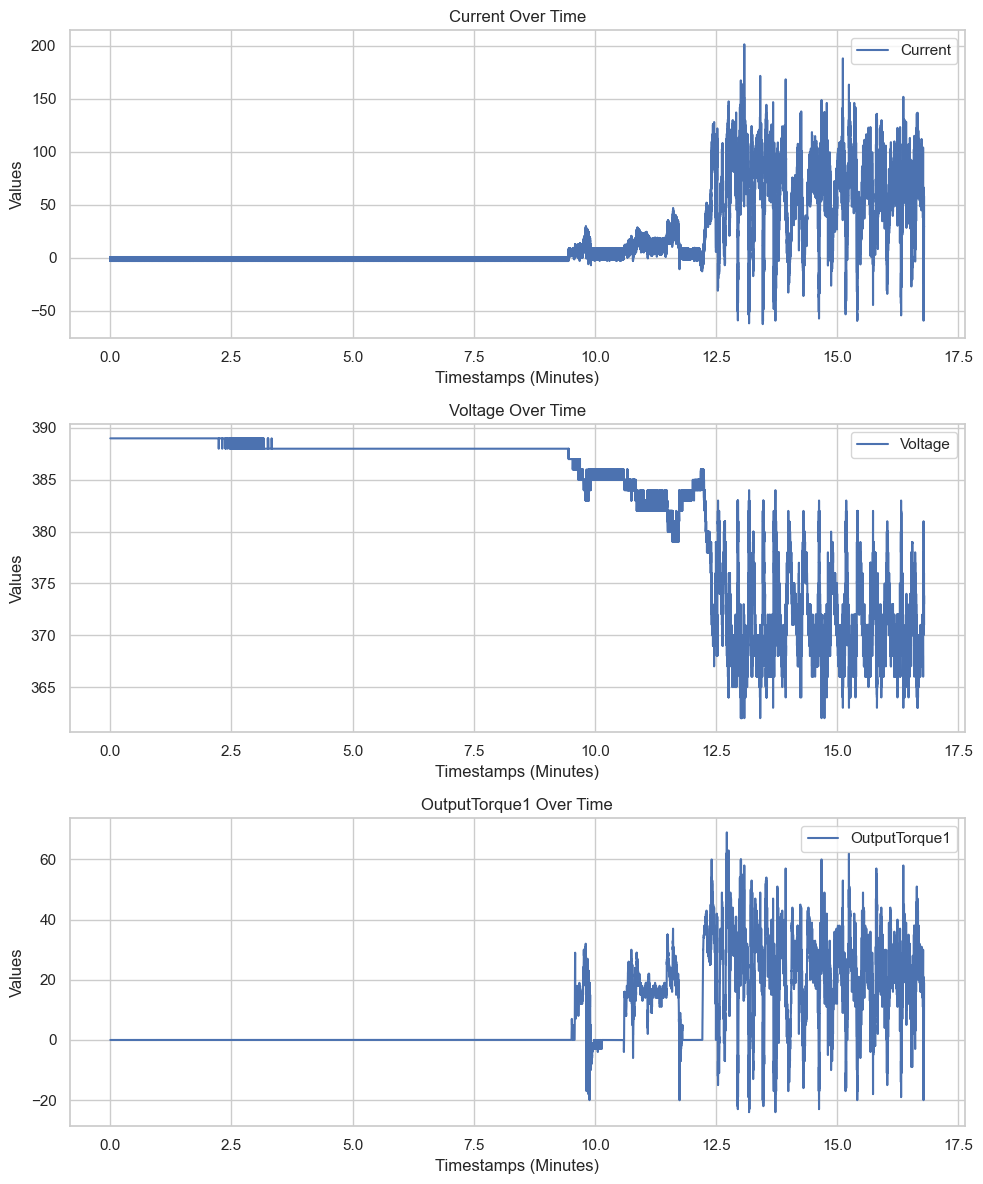

In [33]:
# print(list(df_filtered.columns))
interesting_cols = ["Current",
                    "Voltage",
"OutputTorque1", 
]
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')


# Plotting each interesting column on a separate subplot, excluding the first 580 samples
fig, axes = plt.subplots(len(interesting_cols), 1, figsize=(10, 4*len(interesting_cols)))  # Create a subplot for each column
# sampled_df = df_filtered[df_filtered.index > 580]
sampled_df = df_filtered

for ax, col in zip(axes, interesting_cols):
    ax.plot(sampled_df.index/60, sampled_df[col], "-", label=col)
    ax.set_xlabel('Timestamps (Minutes)')
    ax.set_ylabel('Values')
    ax.set_title(f'{col} Over Time')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [51]:
mdf.info()

{'version': '4.11',
 'program': 'CANedge',
 'comment': '<HDcomment>\n <TX/>\n <common_properties>\n  <tree name="Device Information">\n   <e name="firmware version">00.05.01</e>\n   <e name="hardware version">00.00</e>\n   <e name="serial number">61494E67</e>\n   <e name="device type">61494E67</e>\n  </tree>\n  <tree name="File Information">\n   <e name="session">      32</e>\n   <e name="split">       1</e>\n   <e name="comment">                     device123</e>\n  </tree>\n </common_properties>\n</HDcomment>',
 'groups': 2,
 'group 0': {'cycles': 1487020,
  'comment': '',
  'channels count': 11,
  'channel 0': 'name="Timestamp" type=MASTER',
  'channel 1': 'name="CAN_DataFrame" type=VALUE',
  'channel 2': 'name="CAN_DataFrame.BusChannel" type=VALUE',
  'channel 3': 'name="CAN_DataFrame.ID" type=VALUE',
  'channel 4': 'name="CAN_DataFrame.IDE" type=VALUE',
  'channel 5': 'name="CAN_DataFrame.DLC" type=VALUE',
  'channel 6': 'name="CAN_DataFrame.DataLength" type=VALUE',
  'channel 7':

In [83]:
df_raw_mdf =mdf.to_dataframe(time_as_date=True,only_basenames = False, use_interpolation=False)
df_raw_mdf


# Displaying the data as bytes
df_display = df_raw_mdf.copy()
df_display['CAN_DataFrame.CAN_DataFrame.DataBytes'] = df_display['CAN_DataFrame.CAN_DataFrame.DataBytes'].apply(
    lambda x: ' '.join(f'0x{b:02X}' for b in x)
)
df_display


,CAN_DataFrame.CAN_DataFrame.BusChannel,CAN_DataFrame.CAN_DataFrame.ID,CAN_DataFrame.CAN_DataFrame.IDE,CAN_DataFrame.CAN_DataFrame.DLC,CAN_DataFrame.CAN_DataFrame.DataLength,CAN_DataFrame.CAN_DataFrame.DataBytes,CAN_DataFrame.CAN_DataFrame.Dir,CAN_DataFrame.CAN_DataFrame.EDL,CAN_DataFrame.CAN_DataFrame.BRS
timestamps,,,,,,,,,
2024-08-27 08:12:42.940650+00:00,1,772,0,8,8,0x23 0x0D 0x00 0x42 0x87 0xA7 0x19 0x55,0,0,0
2024-08-27 08:12:42.940900+00:00,1,260,0,7,7,0x5C 0xFD 0xFF 0x87 0x0A 0xFC 0x2F 0x00,0,0,0
2024-08-27 08:12:42.941650+00:00,1,128,0,0,0,0x00 0x00 0x00 0x00 0x00 0x00 0x00 0x00,0,0,0
2024-08-27 08:12:42.941900+00:00,1,786,0,8,8,0x00 0x00 0x00 0x00 0x00 0x00 0x00 0x00,0,0,0
2024-08-27 08:12:42.942150+00:00,1,802,0,8,8,0x00 0x00 0x00 0x00 0x00 0x00 0xAF 0x03,0,0,0
...,...,...,...,...,...,...,...,...,...
2024-08-27 08:29:30.736150+00:00,1,544,0,8,8,0x83 0x3C 0x17 0x03 0x83 0x3F 0x23 0x34,0,0,0
2024-08-27 08:29:30.736400+00:00,1,420573690,1,8,8,0x70 0xFE 0xDC 0x05 0x24 0xFA 0x00 0x00,0,0,0
2024-08-27 08:29:30.736700+00:00,1,420639226,1,8,8,0x2D 0x00 0xD3 0xFF 0x00 0x00 0x00 0x00,0,0,0


In [78]:
print("[bold]Info for raw from mf4 file")
print("Number of different message types:", len(df_raw_mdf['CAN_DataFrame.CAN_DataFrame.ID'].unique()))
print(f"Number of messages: {len(df_raw_mdf.index)}")
print(f"[green] Start: {df_raw_mdf.index[0]}\t, [red]end: {df_raw_mdf.index[-1]}")

Info for raw  from mf4 file

Number of different message types: 55

Number of messages: 1487020

 Start: 2024-08-27 08:12:42.940650+00:00        , end: 2024-08-27 08:29:30.737150+00:00

In [81]:
print("[bold]Info for filtered mf4 file")
print("Number of different message types:", len(df_filtered.columns))
print(f"Number of messages: {len(df_filtered.index)}")
print(f"[green] Start: {df_filtered.index[0]}\t, [red]end: {df_filtered.index[-1]}")

Info for filtered mf4 file

Number of different message types: 117

Number of messages: 827382

 Start: 0.0     , end: 1007.7965

# Using the python-can library

In [84]:
"""
# Required fix for the can.LogReader library:
line 302 in /Users/michaelkatsoulis/miniconda3/envs/4qt/lib/python3.10/site-packages/can/io/mf4.py
 --> masters = [self._mdf.get_master(i) for i in list(self._mdf.virtual_groups.keys())]
"""

# with can.LogReader("data files/extended.mf4") as logs:
with can.LogReader("data files/Log_OG.MF4") as logs:
    for m, msg in enumerate(logs):
        print(f"time{datetime.fromtimestamp(msg.timestamp)} arb: {msg.arbitration_id:X} data: {msg.data.hex()}")
        if m>5: 
            break


time2024-08-27 10:12:42.940650 arb: 304 data: 230d004287a71955

time2024-08-27 10:12:42.940900 arb: 104 data: 5cfdff870afc2f

time2024-08-27 10:12:42.941650 arb: 80 data:

time2024-08-27 10:12:42.941900 arb: 312 data: 0000000000000000

time2024-08-27 10:12:42.942150 arb: 322 data: 000000000000af03

time2024-08-27 10:12:42.942400 arb: 332 data: efff8905ecff1e00

time2024-08-27 10:12:42.942650 arb: 342 data: 3918be010000c80f

In [67]:
print("Reading in MDF")
mdf = MDF(mf4_file)
print(f"Contents of MDF: {mdf}")

print(f"Availible channels:\n\t{mdf.channels_db}\n")
print(f"Contents for 'CAN_DataFrame': \n\t{mdf.get('CAN_DataFrame')}")

Reading in MDF

Contents of MDF: <asammdf.mdf.MDF object at 0x1374c0130>

Availible channels:
        {'Timestamp': ((0, 0),), 'CAN_DataFrame': ((0, 1),), 'CAN_DataFrame.BusChannel': ((0, 2),), 
'CAN_DataFrame.ID': ((0, 3),), 'CAN_DataFrame.IDE': ((0, 4),), 'CAN_DataFrame.DLC': ((0, 5),), 
'CAN_DataFrame.DataLength': ((0, 6),), 'CAN_DataFrame.DataBytes': ((0, 7),), 'CAN_DataFrame.Dir': ((0, 8),), 
'CAN_DataFrame.EDL': ((0, 9),), 'CAN_DataFrame.BRS': ((0, 10),)}

Contents for 'CAN_DataFrame': 
        <Signal CAN_DataFrame:
        samples=[(1,       772, 0, 8, 8, [ 35,  13,   0,  66, 135, 167,  25,  85], 0, 0, 0)
 (1,       260, 0, 7, 7, [ 92, 253, 255, 135,  10, 252,  47,   0], 0, 0, 0)
 (1,       128, 0, 0, 0, [  0,   0,   0,   0,   0,   0,   0,   0], 0, 0, 0)
 ...
 (1, 420639226, 1, 8, 8, [ 45,   0, 211, 255,   0,   0,   0,   0], 0, 0, 0)
 (1,       110, 0, 7, 7, [  3,  69, 142, 204,   5,   0,   1,   0], 0, 0, 0)
 (1,       304, 0, 7, 7, [150,  68,  23,   8,  99, 136,  38,   0], 0, 0, 0)]
        timestamps=[9.40650000e-01 9.40900000e-01 9.41650000e-01 ... 1.00873670e+03
 1.00873695e+03 1.00873715e+03]
        invalidation_bits=None
        unit=""
        conversion=None
        source=<asammdf.blocks.source_utils.Source object at 0x10709d0d0>
        comment=""
        flags="0"
        mastermeta="('Timestamp', 1)"
        raw=False
        display_names={}
        attachment=None>

In [76]:
print(mdf.virtual_groups)
print(mdf.get_master(0))
mdf.get_master(0)

{
    0: VirtualChannelGroup(groups=[0], records_size=22, cycles_nr=1487020),
    1: VirtualChannelGroup(groups=[1], records_size=0, cycles_nr=0)
}

[9.40650000e-01 9.40900000e-01 9.41650000e-01 ... 1.00873670e+03
 1.00873695e+03 1.00873715e+03]

array([9.40650000e-01, 9.40900000e-01, 9.41650000e-01, ...,
       1.00873670e+03, 1.00873695e+03, 1.00873715e+03])

In [81]:
with can.LogReader("data files/Log_OG.MDF", ) as reader:
    for msg in reader:
        print(msg)

ValueError: No read support for unknown log format ".mdf"

In [35]:
import cantools
db = cantools.db.load_file('DBCs/Standard_Electrical_Drive_OHW_v1.7_HYB(1) (1).dbc')
db

version('v1.6')

node('INVCON0', None)
node('VCU', None)
node('INVCON1', None)
node('INVCON2', None)
node('INVCON3', None)
node('INVCON4', None)
node('INVCON5', None)

message('VCU_INV5_06', 0x124, False, 4, None)
  signal('SurgeDamperState5', 0, 2, 'little_endian', False, 0, 1, 0, 0, 3, '-', False, None, {2: 'DstC_int_ext', 1: 'DstC_ext', 0: 'DstC_off'}, None, {None: 'Requested surge damper state'})
  signal('SurgeDamperMaxTorque5', 2, 10, 'little_endian', False, 1022, 1, 0, 0, 1021, 'Nm', False, None, {1023: 'Error', 1022: 'Init'}, None, {None: 'Maximum torque active damping control'})
  signal('SurgeDamperTreshold5', 12, 10, 'little_endian', False, 1022, 1, 0, 0, 1021, 'Nm', False, None, {1023: 'Error', 1022: 'Init'}, None, {None: 'Threshold torque for damping control'})
  signal('SurgeDamperFactor5', 24, 8, 'little_endian', False, 254, 0.03125, 0, 0, 7.96875, '-', False, None, {255: 'Error', 254: 'Init'}, None, {None: 'Calculation factor for surge damper'})

message('VCU_INV4_06', 

In [62]:
nodes = db.nodes
print(f"Nodes: \n\t{nodes}"\n)

msg = db.get_message_by_name("VCU_INV5_06")
print(f"Message found for key'VCU_INV5_06': \n\t{msg}\n")

# For looking for specific signals
# msg.get_signal_by_name('CurrentDemandHV1') 
sig =msg._signals[0]
# getmembers(sig)
print(f"Attributes for signals: \n\t{ sig.__dict__}\n")

Nodes: 
	[node('INVCON0', None), node('VCU', None), node('INVCON1', None), node('INVCON2', None), node('INVCON3', None), node('INVCON4', None), node('INVCON5', None)]
Message found for key'VCU_INV5_06': 
	message('VCU_INV5_06', 0x124, False, 4, None)
Attributes for signals: 
	{'name': 'SurgeDamperState5', 'conversion': NamedSignalConversion(scale=1, offset=0, choices={2: 'DstC_int_ext', 1: 'DstC_ext', 0: 'DstC_off'}, is_float=False), 'minimum': 0, 'maximum': 3, 'start': 0, 'length': 2, 'byte_order': 'little_endian', 'is_signed': False, 'raw_initial': 0, 'initial': 'DstC_off', 'raw_invalid': None, 'invalid': None, 'unit': '-', 'dbc': <cantools.database.can.formats.dbc_specifics.DbcSpecifics object at 0x17f0952a0>, 'receivers': ['INVCON5'], 'is_multiplexer': False, 'multiplexer_ids': None, 'multiplexer_signal': None, 'spn': None, 'comments': {None: 'Requested surge damper state'}}
